In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv('spam_ham_dataset.csv/spam_ham_dataset.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [2]:
df.tail()

,Unnamed: 0,label,text,label_num
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [4]:
df.isna().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [6]:
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 930.9 kB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.8 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.8 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\deepak jain\AppData\Local\Temp\ipykernel_2780\2108095891.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label", data=df, palette=["Orange", "skyblue"])


<Axes: xlabel='label', ylabel='count'>

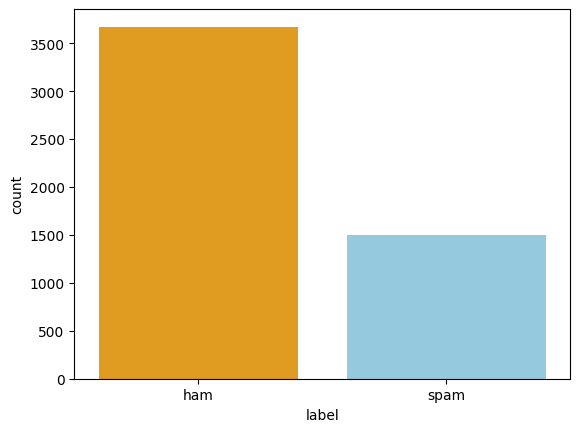

In [9]:
import seaborn as sns
sns.countplot(x="label", data=df, palette=["Orange", "skyblue"])


In [10]:
df['text'][0]

"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

In [11]:
!pip install contractions

     ---------------------------------------- 0.0/289.9 kB ? eta -:--:--
     - -------------------------------------- 10.2/289.9 kB ? eta -:--:--
     ---------------- --------------------- 122.9/289.9 kB 1.8 MB/s eta 0:00:01
     -------------------------------------  286.7/289.9 kB 2.9 MB/s eta 0:00:01
     -------------------------------------- 289.9/289.9 kB 1.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import contractions
from tqdm import tqdm
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords=stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\deepak
[nltk_data]     jain\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [16]:
processed_mails=[]
for i in tqdm(df['text']):
    i=re.sub('(<[\w\s]*/?>)',"",i)
    i=contractions.fix(i)
    i=re.sub('[^a-zA-Z0-9\s]+',"",i)
    i=re.sub('\d+',"",i)
    processed_mails.append(" ".join([j.lower() for j in i.split() if j not in stopwords and len(j)>=3]))

100%|████████████████████████████████████████████████████████████████████████████| 5171/5171 [00:01<00:00, 3305.47it/s]


In [20]:

processed_df=pd.DataFrame({'text':processed_mails,'Spam/Ham':df['label_num'].tolist()})
processed_df.head()

,text,Spam/Ham
0,subject enron methanol meter follow note gave ...,0
1,subject hpl nom january see attached file hpln...,0
2,subject neon retreat around wonderful time yea...,0
3,subject photoshop windows office cheap main tr...,1
4,subject indian springs deal book teco pvr reve...,0


In [22]:
processed_df.isna().sum()

text        0
Spam/Ham    0
dtype: int64

In [23]:
Messages = processed_df.iloc[:,0]

In [24]:
Messages

0       subject enron methanol meter follow note gave ...
1       subject hpl nom january see attached file hpln...
2       subject neon retreat around wonderful time yea...
3       subject photoshop windows office cheap main tr...
4       subject indian springs deal book teco pvr reve...
                              ...                        
5166    subject put transport volumes decreased contra...
5167    subject following noms hpl take extra mmcf wee...
5168    subject calpine daily gas nomination julie men...
5169    subject industrial worksheets august activity ...
5170    subject important online banking alert dear va...
Name: text, Length: 5171, dtype: object

In [25]:
X=processed_df['text']
Y=processed_df['Spam/Ham']

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,stratify=Y,test_size=0.33 , random_state=42)

# Training Using Method 1 

In [28]:
import gensim
from gensim.models import Word2Vec

In [29]:
words_in_sentences=[]
for i in tqdm(x_train):
    words_in_sentences.append(i.split())

100%|███████████████████████████████████████████████████████████████████████████| 3464/3464 [00:00<00:00, 89805.35it/s]


In [30]:
model = Word2Vec(sentences=words_in_sentences, vector_size=250,workers=-1)

In [31]:
model.wv.most_similar('reward', topn=10)

[('comic', 0.22756421566009521),
 ('spokesman', 0.2205696702003479),
 ('children', 0.2192104011774063),
 ('sidebacks', 0.20517535507678986),
 ('ire', 0.2041652351617813),
 ('log', 0.19883283972740173),
 ('dependent', 0.19566947221755981),
 ('imceanotes', 0.1932631880044937),
 ('golf', 0.19036513566970825),
 ('intranet', 0.18760475516319275)]

In [32]:
model.wv.get_vector('job')

array([ 8.3689692e-06, -3.7829280e-03,  2.0862294e-04,  2.6458479e-03,
       -1.1291790e-04, -3.4983344e-03,  8.8510226e-04,  2.9669914e-03,
        2.6372375e-03,  3.2172049e-03,  2.9505705e-03,  1.9237609e-03,
       -6.6783192e-04, -2.4088749e-03,  2.3409587e-03,  4.1735030e-04,
        2.4017559e-03,  2.3436737e-04, -4.8559619e-04, -5.3805544e-04,
       -5.8349897e-04, -1.2676101e-03, -1.5895371e-03,  1.4588990e-03,
       -1.4561915e-03, -3.9867009e-03,  2.0210275e-03,  1.6182151e-03,
       -3.6371355e-03,  3.1868458e-05,  1.6282954e-03,  2.3211990e-03,
        4.9556733e-05, -2.9496583e-03, -1.9632187e-03, -3.3140898e-04,
        2.8119315e-03, -1.6826143e-03, -3.0585928e-03, -1.7782383e-03,
        1.3974666e-03,  3.8479071e-03, -3.7874251e-03,  1.8600698e-03,
       -3.4926229e-03,  2.2158695e-03, -7.0663641e-04, -2.4833803e-03,
        2.3547506e-03,  3.6876174e-03, -1.8557310e-03,  1.1138545e-03,
       -9.9376531e-04, -3.3679914e-03, -3.5243311e-03,  1.8705464e-03,
      

In [38]:
list = []


In [40]:
vocab = model.wv.key_to_index.keys()

In [41]:
def avg_w2vec(sentences):
    transformed=[]
    for sentence in tqdm(sentences):
        count=0
        vector=np.zeros(250)
        for word in sentence.split():
            if word in vocab:
                vector+=model.wv.get_vector(word)
                count+=1
        if count!=0:
            vector/=count
            transformed.append(vector)
        else:
            print(sentence)
    return np.array(transformed)

In [42]:
x_train_transformed=avg_w2vec(x_train)
x_test_transformed=avg_w2vec(x_test)

100%|████████████████████████████████████████████████████████████████████████████| 1707/1707 [00:00<00:00, 5346.31it/s]


In [43]:
from sklearn.ensemble import RandomForestClassifier
# n_estimators = number of decision trees
rf = RandomForestClassifier(n_estimators=30, max_depth=9)
rf.fit(x_train_transformed, y_train)

RandomForestClassifier(max_depth=9, n_estimators=30)

In [44]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 30,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [47]:
from sklearn.metrics import roc_curve, auc,classification_report,confusion_matrix
train_fpr,train_tpr,thresholds=roc_curve(y_train,rf.predict_proba(x_train_transformed)[:,1])
test_fpr,test_tpr,thresholds=roc_curve(y_test,rf.predict_proba(x_test_transformed)[:,1])

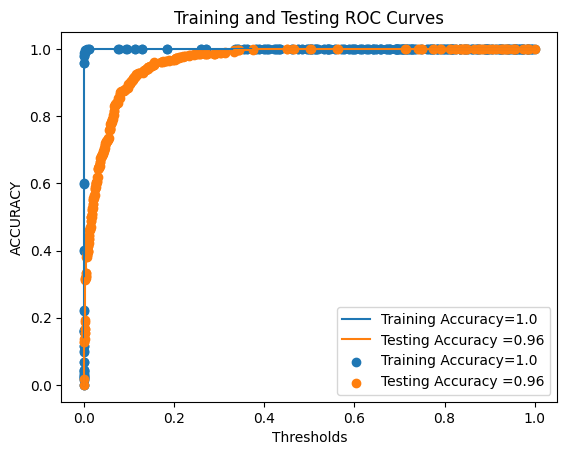

In [48]:
import matplotlib.pyplot as plt
plt.plot(train_fpr,train_tpr,label="Training Accuracy="+str(round(auc(train_fpr, train_tpr),2)))
plt.plot(test_fpr,test_tpr,label="Testing Accuracy ="+str(round(auc(test_fpr, test_tpr),2)))
plt.scatter(train_fpr,train_tpr,label="Training Accuracy="+str(round(auc(train_fpr, train_tpr),2)))
plt.scatter(test_fpr,test_tpr,label="Testing Accuracy ="+str(round(auc(test_fpr, test_tpr),2)))
plt.legend()
plt.xlabel("Thresholds")
plt.ylabel("ACCURACY")
plt.title("Training and Testing ROC Curves")
plt.show()

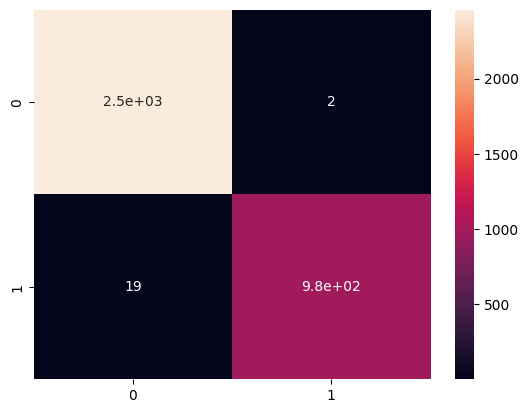

In [49]:
sns.heatmap(confusion_matrix(y_train,rf.predict(x_train_transformed)),annot=True)
plt.show()

In [50]:
print(classification_report(y_train,rf.predict(x_train_transformed)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2460
           1       1.00      0.98      0.99      1004

    accuracy                           0.99      3464
   macro avg       1.00      0.99      0.99      3464
weighted avg       0.99      0.99      0.99      3464



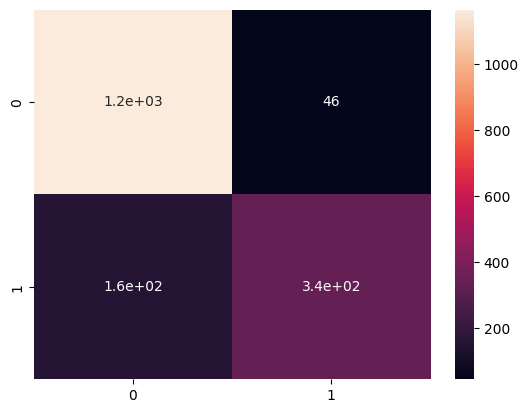

In [51]:
sns.heatmap(confusion_matrix(y_test,rf.predict(x_test_transformed)),annot=True)
plt.show()

In [52]:
print(classification_report(y_test,rf.predict(x_test_transformed)))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1212
           1       0.88      0.68      0.77       495

    accuracy                           0.88      1707
   macro avg       0.88      0.82      0.84      1707
weighted avg       0.88      0.88      0.88      1707



In [53]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,rf.predict(x_test_transformed))
print(score)

0.8804920913884007
